# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [10]:
#existem linhas com dados faltantes?
sinasc['APGAR5'].isna().sum()

103

In [12]:
#retirando linhas com dados faltantes
sinasc_apgar5 = sinasc[~sinasc.APGAR5.isna()]
sinasc_apgar5['APGAR5'].isna().sum() 

0

In [14]:
sinasc_apgar5.loc[sinasc_apgar5['APGAR5'] <= 3, 'cat_apgar'] = 'asfixia_severa'
sinasc_apgar5.loc[(sinasc_apgar5['APGAR5'] >= 4) & (sinasc_apgar5['APGAR5'] <= 5), 'cat_apgar'] = 'asfixia_moderada'
sinasc_apgar5.loc[(sinasc_apgar5['APGAR5'] >= 6) & (sinasc_apgar5['APGAR5'] <= 7), 'cat_apgar'] = 'asfixia_leve'
sinasc_apgar5.loc[sinasc_apgar5['APGAR5'] >= 8, 'cat_apgar'] = 'normal'
sinasc_apgar5

/var/folders/6d/zj4dzyrs16gb3l_wpf9ffyx00000gn/T/ipykernel_83727/1170799565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_apgar5.loc[sinasc_apgar5['APGAR5'] <= 3, 'cat_apgar'] = 'asfixia_severa'


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,cat_apgar
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,normal
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723,normal
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,normal
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [60]:
data = sinasc_apgar5[['SEXO', 'GESTACAO', 'cat_apgar', 'PESO']]
data

,SEXO,GESTACAO,cat_apgar,PESO
0,Masculino,37 a 41 semanas,normal,3685
1,Feminino,37 a 41 semanas,normal,3055
2,Feminino,37 a 41 semanas,normal,3460
3,Feminino,37 a 41 semanas,normal,2982
4,Feminino,37 a 41 semanas,normal,3310
...,...,...,...,...
27023,Masculino,32 a 36 semanas,normal,2110
27024,Masculino,37 a 41 semanas,normal,3310
27025,Masculino,37 a 41 semanas,normal,3065
27026,Masculino,32 a 36 semanas,normal,2352


In [21]:
data.GESTACAO.unique()

array(['37 a 41 semanas', '42 semanas e mais', '32 a 36 semanas',
       '22 a 27 semanas', '28 a 31 semanas', nan, 'Menos de 22 semanas'],
      dtype=object)

In [25]:
#separando grupos por tempo de gestação
grupo1 = data.loc[data['GESTACAO'] == 'Menos de 22 semanas']
grupo2 = data.loc[data['GESTACAO'] == '22 a 27 semanas']
grupo3 = data.loc[data['GESTACAO'] == '28 a 31 semanas']
grupo4 = data.loc[data['GESTACAO'] == '32 a 36 semanas']
grupo5 = data.loc[data['GESTACAO'] == '37 a 41 semanas']
grupo6 = data.loc[data['GESTACAO'] == '42 semanas e mais']

In [74]:
paleta = {'normal': 'b', 'asfixia_leve': 'g', 'asfixia_moderada': 'y', 'asfixia_severa': 'c'}

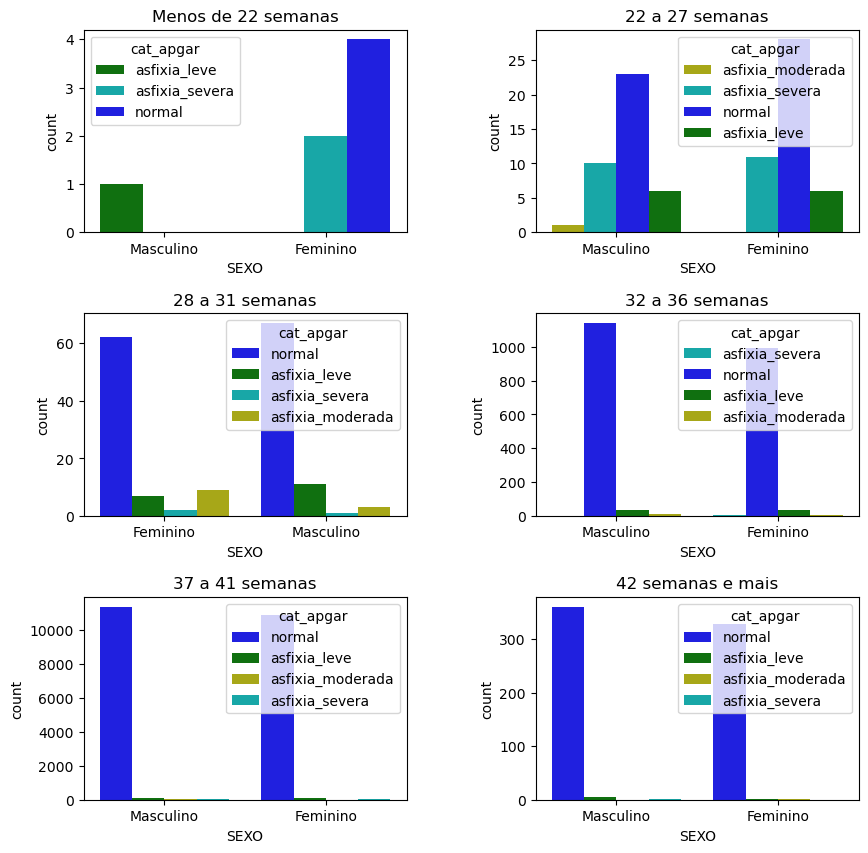

In [75]:
plt.rc('figure', figsize=(10,10))
fig, axes = plt.subplots(3,2)

sns.countplot(ax= axes[0,0]
              , x='SEXO'
              , hue = 'cat_apgar'
              , data=data.loc[data['GESTACAO'] == 'Menos de 22 semanas']
              ,palette=paleta
             ).set_title('Menos de 22 semanas')

sns.countplot(ax= axes[0,1]
              , x='SEXO'
              , hue = 'cat_apgar'
              , data=data.loc[data['GESTACAO'] == '22 a 27 semanas']
              ,palette=paleta
             ).set_title('22 a 27 semanas')

sns.countplot(ax= axes[1,0]
              , x='SEXO'
              , hue = 'cat_apgar'
              , data=data.loc[data['GESTACAO'] == '28 a 31 semanas']
              ,palette=paleta
             ).set_title('28 a 31 semanas')

sns.countplot(ax= axes[1,1]
              , x='SEXO'
              , hue = 'cat_apgar'
              , data=data.loc[data['GESTACAO'] == '32 a 36 semanas']
              ,palette=paleta
             ).set_title('32 a 36 semanas')

sns.countplot(ax= axes[2,0]
              , x='SEXO'
              , hue = 'cat_apgar'
              , data=data.loc[data['GESTACAO'] == '37 a 41 semanas']
              ,palette=paleta
             ).set_title('37 a 41 semanas')

sns.countplot(ax= axes[2,1]
              , x='SEXO'
              , hue = 'cat_apgar'
              , data=data.loc[data['GESTACAO'] == '42 semanas e mais']
              ,palette=paleta
             ).set_title('42 semanas e mais')


plt.subplots_adjust(wspace=0.4, hspace=0.4)



####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [57]:
freq = pd.crosstab(data['GESTACAO'], data['cat_apgar'])
freq

cat_apgar,asfixia_leve,asfixia_moderada,asfixia_severa,normal
GESTACAO,,,,
22 a 27 semanas,12,1,21,51
28 a 31 semanas,18,12,3,129
32 a 36 semanas,73,19,8,2134
37 a 41 semanas,196,28,33,22266
42 semanas e mais,6,1,1,690
Menos de 22 semanas,1,0,2,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [58]:
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

cat_apgar,asfixia_leve,asfixia_moderada,asfixia_severa,normal
GESTACAO,,,,
22 a 27 semanas,0.141176,0.011765,0.247059,0.600000
28 a 31 semanas,0.111111,0.074074,0.018519,0.796296
32 a 36 semanas,0.032677,0.008505,0.003581,0.955237
37 a 41 semanas,0.008702,0.001243,0.001465,0.988589
42 semanas e mais,0.008596,0.001433,0.001433,0.988539
Menos de 22 semanas,0.142857,0.000000,0.285714,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

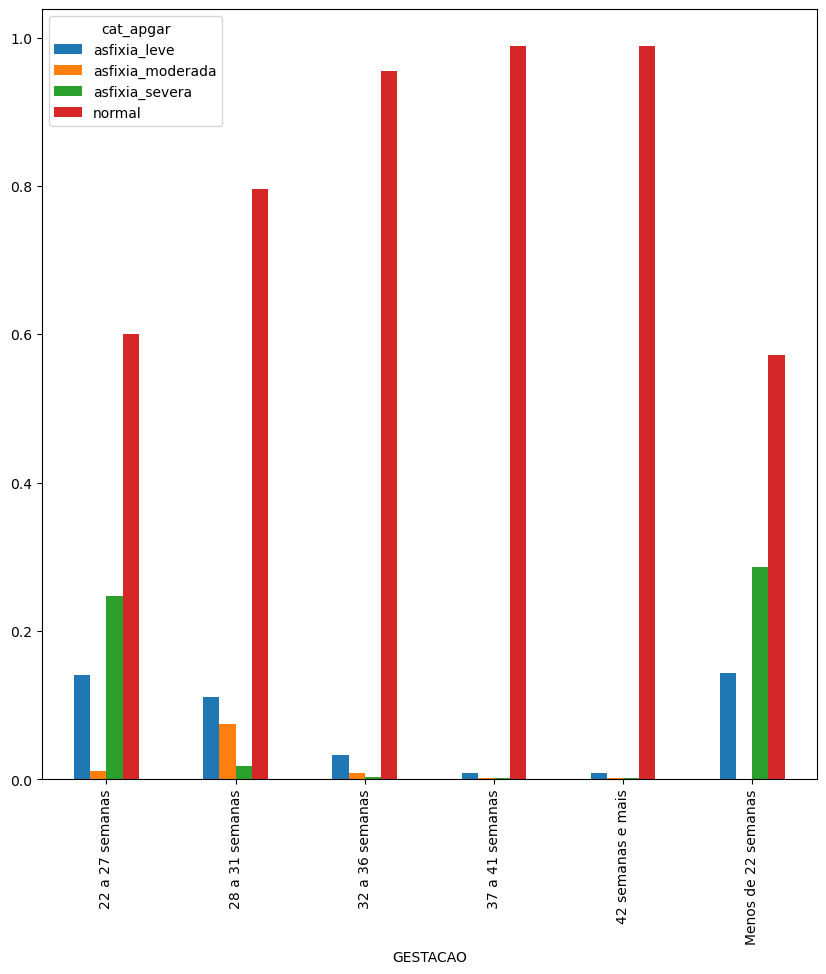

In [59]:
freq_pctlin.plot.bar()

De fato, os partos que ocorreram após 37 semanas são os que apresentam menor frequência de asfixia. Contudo, partos entre 32 e 36 semanas também apresentam baixa frequência de asfixia (e asfixia leve). Apenas partos abaixo de 32 semanas mostram maior frequência de asfixia.
Os dados corroboram com a afirmação de médicos, porém mostram que a partir de 32 semanas a chance de asfixia é baixa. 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

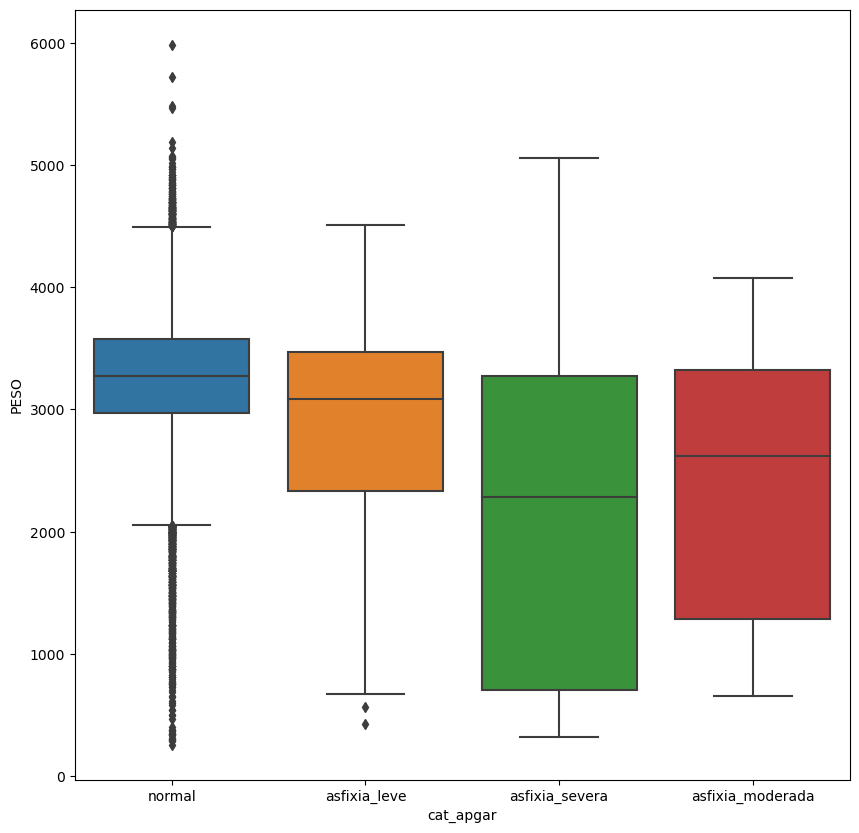

In [76]:
ax = sns.boxplot(x="cat_apgar", y="PESO", data=data)

É possível notar que quanto menor o peso, maiores chances de apresentar asfixia. 